In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime,date

from glob import glob

import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime,date,timedelta
%matplotlib inline

In [40]:
#_EPL_ALL_ = pd.read_csv(r'C:\Data Analysis\Sujay_DataAnalysis\Final\Data\EPL_2005-2006.csv')

2005-2006
Home Wins =  13
Home Loses =  1
Away Wins =  12
Away Loses =  4
Home Goals Conceeded =  8
Home Goals Scored =  37
Away Goals Scored =  35
Away Goals Conceeded =  26
Total points in Season =  83



2006-2007
Home Wins =  15
Home Loses =  2
Away Wins =  13
Away Loses =  3
Home Goals Conceeded =  12
Home Goals Scored =  46
Away Goals Scored =  37
Away Goals Conceeded =  15
Total points in Season =  89



2007-2008
Home Wins =  17
Home Loses =  1
Away Wins =  10
Away Loses =  4
Home Goals Conceeded =  7
Home Goals Scored =  47
Away Goals Scored =  33
Away Goals Conceeded =  15
Total points in Season =  87



2008-2009
Home Wins =  16
Home Loses =  1
Away Wins =  12
Away Loses =  3
Home Goals Conceeded =  13
Home Goals Scored =  43
Away Goals Scored =  25
Away Goals Conceeded =  11
Total points in Season =  90



2009-2010
Home Wins =  16
Home Loses =  2
Away Wins =  11
Away Loses =  5
Home Goals Conceeded =  12
Home Goals Scored =  52
Away Goals Scored =  34
Away Goals Conceeded 

,index,Season Year,Home Wins,Away Wins,Home Losses,Away Losses,Home Goals Conceeded,Away Goals Conceeded,Home Goals scored,Away Goals Scored,Total Points
0,1,2005-2006,13.0,12.0,1.0,4.0,8.0,26.0,37.0,35.0,83.0
1,2,2006-2007,15.0,13.0,2.0,3.0,12.0,15.0,46.0,37.0,89.0
2,3,2007-2008,17.0,10.0,1.0,4.0,7.0,15.0,47.0,33.0,87.0
3,4,2008-2009,16.0,12.0,1.0,3.0,13.0,11.0,43.0,25.0,90.0
4,5,2009-2010,16.0,11.0,2.0,5.0,12.0,16.0,52.0,34.0,85.0


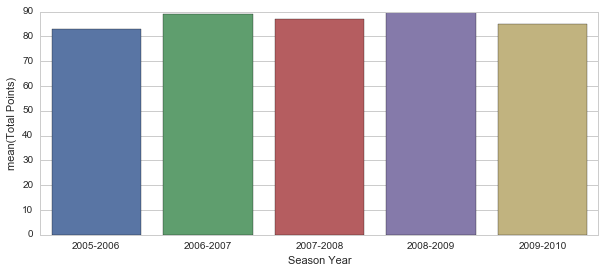

In [4]:
Team_Name = "Man United"

cntt = 0
#all_years = []
#data = list(range(0,10))
columns = ['Season Year', 'Home Wins','Away Wins','Home Losses','Away Losses','Home Goals Conceeded','Away Goals Conceeded','Home Goals scored','Away Goals Scored','Total Points']
all_years = pd.DataFrame(np.nan,index=[0], columns=columns)
#all_years = all_years.fillna(0)
single_year = list(range(10))

for file_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Data\*.csv"):
    _EPL_ALL_ = pd.read_csv(file_)
    
    year = file_.split('\\')[-1].split('.')[0].split('_')[1]
    print(year)
    #Analysis One Get only set of Data Needed
    Analysis_1_Data = _EPL_ALL_[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

    _All_Matches_ = Analysis_1_Data.loc[(Analysis_1_Data["HomeTeam"] == Team_Name) | (Analysis_1_Data["AwayTeam"] == Team_Name)]

    #single_year = _All_Matches_[['Date']]
    
    #Total_matches = _Team_Matches_.AwayTeam.count()

    _Home_Matches_ = _All_Matches_.loc[(_All_Matches_["HomeTeam"] == Team_Name)]
    _Away_Matches_ = _All_Matches_.loc[(_All_Matches_["AwayTeam"] == Team_Name)]

    #print("",_Home_Matches_)
    #print("\n\n\n\n")
    #print(_Away_Matches_)

    Home_Wins = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "H")]
    Home_Win_Count = Home_Wins.FTR.count()

    Home_loss = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "A")]
    Home_loss_Count = Home_loss.FTR.count()

    Home_draw = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "D")]
    Home_draw_Count = Home_draw.FTR.count()

    print("Home Wins = ",Home_Win_Count)
    print("Home Loses = ",Home_loss_Count)


    Away_Wins = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "A")]
    Away_Wins_Count = Away_Wins.FTR.count()


    Away_loss = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "H")]
    Away_loss_Count = Away_loss.FTR.count()

    Away_draw = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "D")]
    Away_draw_Count = Away_draw.FTR.count()

    print("Away Wins = ",Away_Wins_Count)
    print("Away Loses = ",Away_loss_Count)

    Home_Goals_scored = _Home_Matches_.FTHG.sum()
    Away_Goals_scored = _Away_Matches_.FTAG.sum()
    Home_Goals_conceeded = _Home_Matches_.FTAG.sum()
    Away_Goals_conceeded = _Away_Matches_.FTHG.sum()
    print("Home Goals Conceeded = ",Home_Goals_conceeded)
    print("Home Goals Scored = ",Home_Goals_scored)
    print("Away Goals Scored = ",Away_Goals_scored)
    print("Away Goals Conceeded = ",Away_Goals_conceeded)
    #print(Home_draw_Count)
    #print(Away_draw_Count)

    Total_Points = ((Home_Win_Count + Away_Wins_Count) * 3) + Home_draw_Count + Away_draw_Count
    print("Total points in Season = ",Total_Points)
    
    #single_year.append(year)
    #single_year.append(Home_Win_Count)
    #single_year.append(Away_Wins_Count)
    #single_year.append(Home_loss_Count)
    #single_year.append(Away_loss_Count)
    #single_year.append(Home_Goals_conceeded)
    #single_year.append(Away_Goals_conceeded)
    #single_year.append(Home_Goals_scored)
    #single_year.append(Away_Goals_scored)
    #single_year.append(Total_Points)
    
    single_year[0] = year
    single_year[1] = Home_Win_Count
    single_year[2] = Away_Wins_Count
    single_year[3] = Home_loss_Count
    single_year[4] = Away_loss_Count
    single_year[5] = Home_Goals_conceeded
    single_year[6] = Away_Goals_conceeded
    single_year[7] = Home_Goals_scored
    single_year[8] = Away_Goals_scored
    single_year[9] = Total_Points
    
    
    single_df = pd.DataFrame([single_year],columns=columns)
    
    #single_year['Season Year'] = year
    #single_year['Home Wins'] = Home_Win_Count
    #single_year['Away Wins'] = Away_Wins_Count
    #single_year['Home Losses'] = Home_loss_Count
    #single_year['Away Losses'] = Away_loss_Count
    #single_year['Home Goals Conceeded'] = Home_Goals_conceeded
    #single_year['Away Goals Conceeded'] = Away_Goals_conceeded
    #single_year['Home Goals scored'] = Home_Goals_scored
    #single_year['Away Goals Scored'] = Away_Goals_scored
    #single_year['Total Points'] = Total_Points
    all_years = all_years.append([single_df],ignore_index=True)
    
    
    #print(single_year)
    cntt += 1
    if cntt == 5: break
        
    print("\n\n")
    
#final_df = pd.concat(all_years)
#final_df
all_years = all_years.drop(all_years.index[0])
#all_years


#,hue='Total Points'

plt.subplots(figsize=(10,4))
sns.set_style('whitegrid')
sns.barplot(x='Season Year',y='Total Points',data=all_years)

all_years.reset_index()
#hh = all_years.ix[1]
#hh
#Analysis_1_Data
#_All_Matches_

In [ ]:
#Analysis 2 
#EPL_Managers

In [140]:
Team_Name1 = "Chelsea"

_manger_file_ = r"C:\Data Analysis\Sujay_DataAnalysis\Final\Data\EPL_Managers.csv"
_Raw_file_ = pd.read_csv(_manger_file_)
_EPL_Managers_ = _Raw_file_[['Name','Club','From','Until','Duration (days)','Years in Premier League']]
#_EPL_Managers_.loc[['Club']]

#_Team_Managers_ = _EPL_Managers_.loc[(_EPL_Managers_["Club"] == Team_Name1
#_Team_Managers_ = _EPL_Managers_.loc[:,(['Club'] == Team_Name1)]
#_Team_Managers_
#
_Team_Managers_ = _EPL_Managers_[_EPL_Managers_['Club'] == Team_Name1]
#_EPL_Managers_.loc[(_EPL_Managers_['Club'] == Team_Name)]
#_Team_Managers_ = _EPL_Managers_.loc[(_EPL_Managers_["Club"])] 
#Name	Club	From	Until	Duration (days)	Years in Premier Leagu

ss  = _Team_Managers_[['Name','From','Until']]
rst = ss.reset_index(drop=True)
rst

,Name,From,Until
0,Ian Porterfield,11-Jun-91,15-Feb-93
1,David Webb,15-Feb-93,11-May-93
2,Glenn Hoddle,4-Jun-93,10-May-96
3,Ruud Gullit,10-May-96,12-Feb-98
4,Gianluca Vialli,12-Feb-98,12-Sep-00
5,Graham Rix,13-Sep-00,17-Sep-00
6,Ray Wilkins,13-Sep-00,17-Sep-00
7,Claudio Ranieri,18-Sep-00,31-May-04
8,José Mourinho,2-Jun-04,20-Sep-07
9,Avram Grant,29-Sep-07,24-May-08


In [151]:
def my_test(x):
    #print(x)
    ret_str = ""
    temp = x.split('-')[-1]
    #print(temp)
    if temp <= '16':
        ret_str = "20" + str(temp)
    else:
        ret_str = "19" + str(temp)
    return ret_str


year1 = rst[['From','Until']]
year1['StartYear'] = year1.apply(lambda X: my_test(X['From']), axis=1)
year1['EndYear'] = year1.apply(lambda X: my_test(X['Until']), axis=1)
#year = year1.From.apply(lambda x: x.split('-')[-1])
#ytf = year.to_frame()
#df1 = ytf.rename(columns={'From':'MinYears'})
#df1
#year = year1.MinYears.apply(year1.From.apply(lambda x: x.split('-')[-1]))
year1

#df.apply(lambda row: my_test(row['a'], row['c']), axis=1)

,From,Until,StartYear,EndYear
0,11-Jun-91,15-Feb-93,1991,1993
1,15-Feb-93,11-May-93,1993,1993
2,4-Jun-93,10-May-96,1993,1996
3,10-May-96,12-Feb-98,1996,1998
4,12-Feb-98,12-Sep-00,1998,2000
5,13-Sep-00,17-Sep-00,2000,2000
6,13-Sep-00,17-Sep-00,2000,2000
7,18-Sep-00,31-May-04,2000,2004
8,2-Jun-04,20-Sep-07,2004,2007
9,29-Sep-07,24-May-08,2007,2008


In [156]:
#ss.reset_index(drop=True)['From'].to_frame().From.apply(lambda x: x.split('-')[-1] <= '16')

#ss[ss['From'].split('-')[-1] <= '16']
#ss[ss['From'].reset_index(drop=True)[0].split('-')[-1] <= '16']

#ss.reset_index(drop=True)
#ss.merge(year.to_frame())
#ss

fin = pd.merge(rst,year1)

_MANGERS_and_Year = fin[fin['StartYear'] >= '2000'].reset_index(drop=True)
_MANGERS_and_Year

,Name,From,Until,StartYear,EndYear
0,Graham Rix,13-Sep-00,17-Sep-00,2000,2000
1,Graham Rix,13-Sep-00,17-Sep-00,2000,2000
2,Ray Wilkins,13-Sep-00,17-Sep-00,2000,2000
3,Ray Wilkins,13-Sep-00,17-Sep-00,2000,2000
4,Claudio Ranieri,18-Sep-00,31-May-04,2000,2004
5,José Mourinho,2-Jun-04,20-Sep-07,2004,2007
6,Avram Grant,29-Sep-07,24-May-08,2007,2008
7,Luiz Felipe Scolari,1-Jul-08,9-Feb-09,2008,2009
8,Ray Wilkins,9-Feb-09,16-Feb-09,2009,2009
9,Guus Hiddink,16-Feb-09,31-May-09,2009,2009


In [159]:
temp  = _MANGERS_and_Year[['Name','From','Until','StartYear','EndYear']]
_MANGERS_TO_ANALYSE_ = temp.drop_duplicates().reset_index(drop=True)
_MANGERS_TO_ANALYSE_

,Name,From,Until,StartYear,EndYear
0,Graham Rix,13-Sep-00,17-Sep-00,2000,2000
1,Ray Wilkins,13-Sep-00,17-Sep-00,2000,2000
2,Claudio Ranieri,18-Sep-00,31-May-04,2000,2004
3,José Mourinho,2-Jun-04,20-Sep-07,2004,2007
4,Avram Grant,29-Sep-07,24-May-08,2007,2008
5,Luiz Felipe Scolari,1-Jul-08,9-Feb-09,2008,2009
6,Ray Wilkins,9-Feb-09,16-Feb-09,2009,2009
7,Guus Hiddink,16-Feb-09,31-May-09,2009,2009
8,Carlo Ancelotti,1-Jun-09,22-May-11,2009,2011
9,André Villas-Boas,22-Jun-11,4-Mar-12,2011,2012


In [6]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
index=pd.Index(['Ohio', 'Colorado'], name='state'), columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [8]:
result = data.stack()
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [12]:
df = pd.DataFrame({'das': result, 'aaa': result + 5}, columns=pd.Index(['das', 'aaa'], name='side'))
df

side             das  aaa
state    number          
Ohio     one       0    5
         two       1    6
         three     2    7
Colorado one       3    8
         two       4    9
         three     5   10

In [15]:
df = pd.DataFrame({result,  result + 5}, columns=pd.Index(['das', 'aaa'], name='side'))
df

side,das,aaa
0,NaN,NaN
1,NaN,NaN


In [16]:
np.arange(6).reshape((2, 3))

array([[0, 1, 2],
       [3, 4, 5]])

In [47]:
all_years

,Season Year,Home Wins,Away Wins,Home Losses,Away Losses,Home Goals Conceeded,Away Goals Conceeded,Home Goals scored,Away Goals Scored,Total Points
1,2005-2006,13.0,12.0,1.0,4.0,8.0,26.0,37.0,35.0,83.0
2,2006-2007,15.0,13.0,2.0,3.0,12.0,15.0,46.0,37.0,89.0
3,2007-2008,17.0,10.0,1.0,4.0,7.0,15.0,47.0,33.0,87.0
4,2008-2009,16.0,12.0,1.0,3.0,13.0,11.0,43.0,25.0,90.0
5,2009-2010,16.0,11.0,2.0,5.0,12.0,16.0,52.0,34.0,85.0


In [46]:
TP = all_years.transpose()
TP

,1,2,3,4,5
Season Year,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010
Home Wins,13,15,17,16,16
Away Wins,12,13,10,12,11
Home Losses,1,2,1,1,2
Away Losses,4,3,4,3,5
Home Goals Conceeded,8,12,7,13,12
Away Goals Conceeded,26,15,15,11,16
Home Goals scored,37,46,47,43,52
Away Goals Scored,35,37,33,25,34
Total Points,83,89,87,90,85


In [50]:

li_details = []

df1 = all_years[['Home Wins']]
df2 = all_years[['Away Wins']]
df3 = all_years[['Home Losses']]
df4 = all_years[['Away Losses']]
df5 = all_years[['Home Goals scored']]

li_details.append(df1)
li_details.append(df2)
#li_details.append(df3)
#li_details.append(df4)
#li_details.append(df5)

all_stats = []

for col in all_years.columns:
    print(all_years[col])
    each_col = all_years[[col]].rename(columns={col:'Stats'})
    each_col['Statistics'] = col
    all_stats.append(each_col)
    
final_df = pd.concat(all_stats)    
final_df.reset_index()

1               2005-2006
2               2006-2007
3               2007-2008
4               2008-2009
5               2009-2010
Statistics    Season Year
Name: Season Year, dtype: object
1                    13
2                    15
3                    17
4                    16
5                    16
Statistics    Home Wins
Name: Home Wins, dtype: object
1                    12
2                    13
3                    10
4                    12
5                    11
Statistics    Away Wins
Name: Away Wins, dtype: object
1                       1
2                       2
3                       1
4                       1
5                       2
Statistics    Home Losses
Name: Home Losses, dtype: object
1                       4
2                       3
3                       4
4                       3
5                       5
Statistics    Away Losses
Name: Away Losses, dtype: object
1                                8
2                               12
3            

,index,Stats,Statistics
0,1,2005-2006,Season Year
1,2,2006-2007,Season Year
2,3,2007-2008,Season Year
3,4,2008-2009,Season Year
4,5,2009-2010,Season Year
5,1,13,Home Wins
6,2,15,Home Wins
7,3,17,Home Wins
8,4,16,Home Wins
9,5,16,Home Wins


ValueError: Could not interpret input 'index'

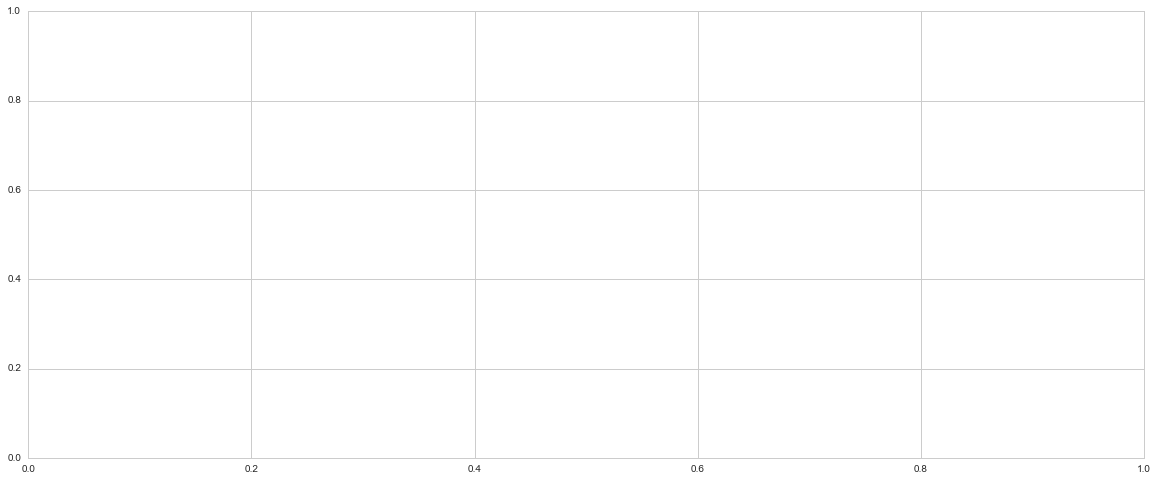

In [55]:
plt.subplots(figsize=(20,8))
sns.barplot(x='index',y='Stats',hue='Statistics',data=final_df)

In [33]:
final_df

1                        2005-2006
2                        2006-2007
3                        2007-2008
4                        2008-2009
5                        2009-2010
Statistics             Season Year
1                               13
2                               15
3                               17
4                               16
5                               16
Statistics               Home Wins
1                               12
2                               13
3                               10
4                               12
5                               11
Statistics               Away Wins
1                                1
2                                2
3                                1
4                                1
5                                2
Statistics             Home Losses
1                                4
2                                3
3                                4
4                                3
5                   

In [314]:
li = [45,45,323,2323]



#df = pd.DataFrame([1, 2, 3, 4], columns=['B'])
#df_li = pd.DataFrame([45,45,323,2323], columns=['B'])
#df = df.append([df_li],ignore_index=True)


columns = ['Season Year', 'Home Wins','Away Wins','Home Losses']
df = pd.DataFrame(np.nan, index=[0], columns=columns)
df_li = pd.DataFrame([li], columns=columns)
df = df.append([df_li], ignore_index=True)
#df.drop(df.index[0])
df

all_candidate = []
for can_name in 'Season Year', 'Home Wins','Away Wins','Home Losses':
    single_candidate = df[['Season Year',can_name]].rename(columns={can_name:'das'})
    single_candidate['name'] = can_name
    all_candidate.append(single_candidate)
#final_candidate_df = pd.concat(all_candidate)
#final_candidate_df

single_candidate

,Season Year,das,name
0,NaN,NaN,Home Losses
1,45.0,2323.0,Home Losses


In [229]:
a =1
for i in range(0,10):
        print(i)
        
ll = list(range(10))
print(ll)

0
1
2
3
4
5
6
7
8
9
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [132]:


all_df = []
df = pd.DataFrame(np.nan, index=[0,1,2,3], columns=['A'])
#print(df)

for file1_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Data\*.csv"):
    _EPL_ALL1_ = pd.read_csv(file1_)
    
    name1 = file1_.split('\\')[-1].split('.')[0].split('_')[1]
    print(name1)
    df['name'] = name1
    all_df.append(df)
    print(all_df)
    print("\n\n")
f_df = pd.concat(all_df,ignore_index=True)

2005-2006
[    A       name
0 NaN  2005-2006
1 NaN  2005-2006
2 NaN  2005-2006
3 NaN  2005-2006]



2006-2007
[    A       name
0 NaN  2006-2007
1 NaN  2006-2007
2 NaN  2006-2007
3 NaN  2006-2007,     A       name
0 NaN  2006-2007
1 NaN  2006-2007
2 NaN  2006-2007
3 NaN  2006-2007]



2007-2008
[    A       name
0 NaN  2007-2008
1 NaN  2007-2008
2 NaN  2007-2008
3 NaN  2007-2008,     A       name
0 NaN  2007-2008
1 NaN  2007-2008
2 NaN  2007-2008
3 NaN  2007-2008,     A       name
0 NaN  2007-2008
1 NaN  2007-2008
2 NaN  2007-2008
3 NaN  2007-2008]



2008-2009
[    A       name
0 NaN  2008-2009
1 NaN  2008-2009
2 NaN  2008-2009
3 NaN  2008-2009,     A       name
0 NaN  2008-2009
1 NaN  2008-2009
2 NaN  2008-2009
3 NaN  2008-2009,     A       name
0 NaN  2008-2009
1 NaN  2008-2009
2 NaN  2008-2009
3 NaN  2008-2009,     A       name
0 NaN  2008-2009
1 NaN  2008-2009
2 NaN  2008-2009
3 NaN  2008-2009]



2009-2010
[    A       name
0 NaN  2009-2010
1 NaN  2009-2010
2 NaN  2009-2010
3 NaN

In [95]:
Team_Name = "Man United"

#Analysis One Get only set of Data Needed
Analysis_1_Data = _EPL_ALL_[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

_All_Matches_ = Analysis_1_Data.loc[(Analysis_1_Data["HomeTeam"] == Team_Name) | (Analysis_1_Data["AwayTeam"] == Team_Name)]
#_All_Matches_

#Total_matches = _Team_Matches_.AwayTeam.count()

_Home_Matches_ = _All_Matches_.loc[(_All_Matches_["HomeTeam"] == Team_Name)]
_Away_Matches_ = _All_Matches_.loc[(_All_Matches_["AwayTeam"] == Team_Name)]

print(_Home_Matches_)
print("\n\n\n\n")
print(_Away_Matches_)


Home_Wins = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "H")]
Home_Win_Count = Home_Wins.FTR.count()

Home_loss = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "A")]
Home_loss_Count = Home_loss.FTR.count()

Home_draw = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "D")]
Home_draw_Count = Home_draw.FTR.count()

print(Home_Win_Count)
print(Home_loss_Count)


Away_Wins = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "A")]
Away_Wins_Count = Away_Wins.FTR.count()


Away_loss = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "H")]
Away_loss_Count = Away_loss.FTR.count()

Away_draw = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "D")]
Away_draw_Count = Away_draw.FTR.count()

print(Away_Wins_Count)
print(Away_loss_Count)

Home_Goals_scored = _Home_Matches_.FTHG.sum()
Home_Goals_conceeded = _Home_Matches_.FTAG.sum()
Home_Goals_conceeded


print(Home_draw_Count)
print(Away_draw_Count)

Total_Points = ((Home_Win_Count + Away_Wins_Count) * 3) + Home_draw_Count + Away_draw_Count
Total_Points

         Date    HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR
14   20/08/05  Man United    Aston Villa     1     0   H     0     0   D
39   10/09/05  Man United       Man City     1     1   D     1     0   H
60   24/09/05  Man United      Blackburn     1     2   A     0     1   A
90   22/10/05  Man United      Tottenham     1     1   D     1     0   H
114  06/11/05  Man United        Chelsea     1     0   H     1     0   H
140  03/12/05  Man United     Portsmouth     3     0   H     1     0   H
154  11/12/05  Man United        Everton     1     1   D     1     1   D
157  14/12/05  Man United          Wigan     4     0   H     2     0   H
171  26/12/05  Man United      West Brom     3     0   H     2     0   H
188  31/12/05  Man United         Bolton     4     1   H     2     1   H
222  22/01/06  Man United      Liverpool     1     0   H     0     0   D
237  04/02/06  Man United         Fulham     4     2   H     3     2   H
286  12/03/06  Man United      Newcastle     2     

83